Let's Start by rebuilding our Toy Dataset:

$\gamma_{api}=\frac{141.5}{\gamma_o}-131.5$

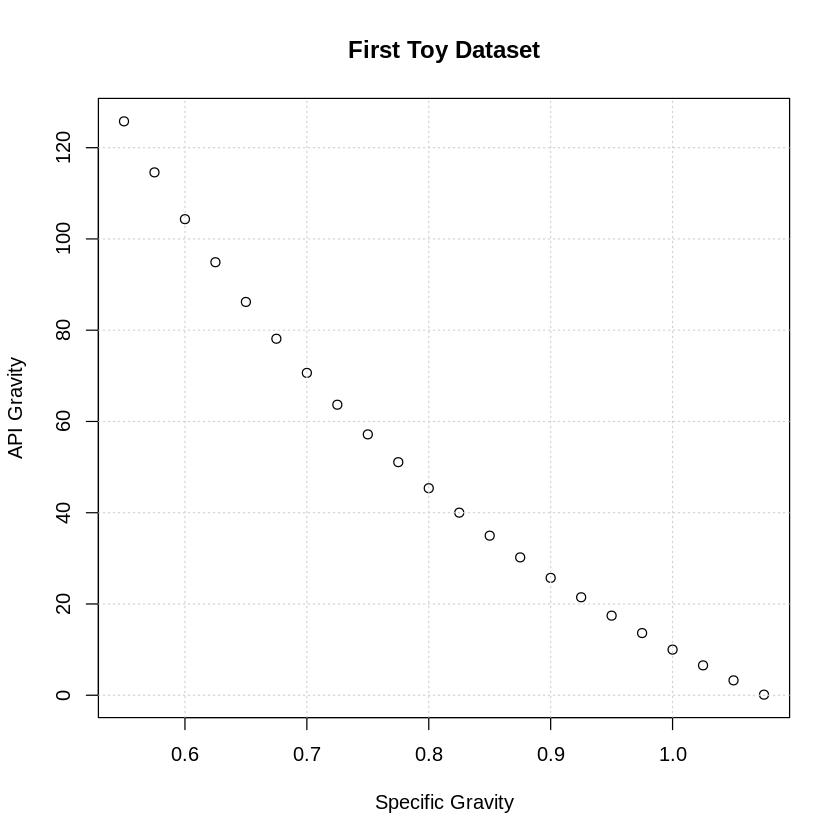

In [5]:
x<-seq(from=0.55,to=1.075,by=0.025)
y<-141.5/x-131.5
plot(x,y,main="First Toy Dataset",xlab="Specific Gravity",ylab="API Gravity")
grid()

In [6]:
install.packages("gramEvol")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Grammatical Evolution
lorem ipsum

In [7]:
library("gramEvol")

In [10]:
w<-seq(from=111.5,to=171.5,by=10.0)
# Define the Rules
ruleDef<-list(expr=grule(op(expr,expr),var,con),
          op=grule('+','-','*','/'),
          var=grule(x),
          con=gvrule(w))
# Create Grammar
grammarDef<-CreateGrammar(ruleDef)
# Prints Backus-Naur Version
grammarDef

<expr> ::= <op>(<expr>, <expr>) | <var> | <con>
<op>   ::= "+" | "-" | "*" | "/"
<var>  ::= x
<con>  ::= 111.5 | 121.5 | 131.5 | 141.5 | 151.5 | 161.5 | 171.5

|1|2|3|4|5|
|---|---|---|---|---|
|-|/|141.5|x|131.5|

In [11]:
set.seed(13)
GrammarRandomExpression(grammarDef,15)

[[1]]
expression(131.5)

[[2]]
expression(141.5)

[[3]]
expression(x)

[[4]]
expression(171.5 + 161.5 * 141.5)

[[5]]
expression(x * x)

[[6]]
expression(x)

[[7]]
expression(151.5)

[[8]]
expression(151.5 * 151.5)

[[9]]
expression(x)

[[10]]
expression(x)

[[11]]
expression(x - x)

[[12]]
expression(x)

[[13]]
expression(x * 131.5)

[[14]]
expression(x)

[[15]]
expression(151.5)


In [14]:
SymRegFitFunc<-function(expr){
  result<-eval(expr)
  if (any(is.nan(result)))
    return(Inf)
  return (mean(log(1+abs(y-result))))
}

In [15]:
set.seed(17)
ge<-GrammaticalEvolution(grammarDef,
      SymRegFitFunc,
      terminationCost=0.1,
      iterations=2500,
      max.depth=10)

In [16]:
ge

Grammatical Evolution Search Results:
  No. Generations:  1850 
  Best Expression:  141.5/x - 131.5 
  Best Cost:        0 